In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from seizure_algo.classes_n_functions.class_matrices import Matrices

import sklearn
from sklearn.decomposition import PCA
import scipy.stats
from scipy.stats import anderson
import seaborn as sns

In [91]:
file = '/Users/jshensley/Desktop/Cap3_Nico_MUSC/seizure_algo/dataframes/master.csv'
master_new = pd.read_csv(file)
master_new.drop(columns=['Unnamed: 0'], inplace=True)
# ----------------------------------------------------------------------------
# Get Posterior shape for Bayesian inference
master_new.iloc[:2, :].fillna(method='bfill', inplace=True)
seizure = master_new.iloc[10241:, :]
master_new_cols = list(range(33))

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/1479883429.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_new.iloc[:2, :].fillna(method='bfill', inplace=True)


I've taken the EEG data from Capstone 2 and created various calculations pertaining to linearizing the brain's nonlineaty via my custom classes and let's see what that data looks like:

In [92]:
master_new.columns = master_new_cols
master_new = master_new.rename(index={10240: 'seizure start'})
master_new

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.423979,0.540130,0.669683,0.704028,0.580810,0.450155,0.597679,0.824542,0.500264,0.500054,...,0.423927,0.416392,0.537684,0.808312,0.226368,0.416368,0.807942,0.513919,0.5,0.513919
1,0.480555,0.487921,0.669291,0.659567,0.548941,0.434914,0.547101,0.776084,0.500264,0.500054,...,0.499073,0.454152,0.406462,0.808312,0.226368,0.416368,0.807942,0.513919,0.5,0.513919
2,0.530425,0.460528,0.669808,0.636752,0.516752,0.410078,0.506831,0.739267,0.491168,0.515814,...,0.608718,0.471404,0.420729,0.134337,0.528082,0.347510,0.237243,0.488912,0.5,0.488912
3,0.543422,0.471192,0.674127,0.652752,0.507677,0.395561,0.531545,0.758460,0.497915,0.517964,...,0.562408,0.480349,0.467906,0.879692,0.513607,0.530696,0.799008,0.524471,0.5,0.524471
4,0.573372,0.465298,0.687709,0.636912,0.487349,0.394541,0.540837,0.747141,0.494565,0.517959,...,0.622676,0.495421,0.477540,0.119284,0.440511,0.496595,0.254568,0.481719,0.5,0.481719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20475,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.804991,0.498061,...,1.000000,1.000000,1.000000,0.816619,0.491514,0.509350,0.808801,1.000000,0.5,1.000000
20476,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.505063,0.494993,...,1.000000,1.000000,1.000000,0.507155,0.488232,0.508859,0.510125,0.500000,1.0,1.000000
20477,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.499674,0.499541,...,1.000000,1.000000,1.000000,0.494891,0.503265,0.493591,0.497317,0.500000,1.0,1.000000
20478,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.494638,0.504109,...,1.000000,1.000000,1.000000,0.493561,0.515548,0.492496,0.485847,0.500000,1.0,1.000000


What sort of information are we looking at?

In [93]:
master_new.describe().T

,count,mean,std,min,25%,50%,75%,max
0,20480.0,0.510158,0.114179,3.626637e-01,0.423528,0.484865,0.570175,1.000000
1,20480.0,0.508136,0.111788,3.641055e-01,0.424549,0.483214,0.566451,1.000000
2,20480.0,0.511003,0.112344,3.606352e-01,0.427868,0.488400,0.567438,1.000000
3,20480.0,0.512658,0.113900,3.669833e-01,0.429857,0.487324,0.564315,1.000000
4,20480.0,0.509759,0.114238,3.612461e-01,0.424839,0.483758,0.566543,1.000000
5,20480.0,0.512347,0.109617,3.677553e-01,0.429510,0.489746,0.571052,1.000000
6,20480.0,0.507136,0.110368,3.683520e-01,0.427354,0.481515,0.558637,1.000000
7,20480.0,0.511147,0.117352,3.573862e-01,0.424159,0.485648,0.568888,1.000000
8,20480.0,0.499957,0.115088,1.192071e-01,0.487871,0.499925,0.511835,0.880782
9,20480.0,0.499994,0.075174,1.252092e-01,0.475120,0.500082,0.525051,0.872300


In [94]:
master_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20480 entries, 0 to 20479
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20480 non-null  float64
 1   1       20480 non-null  float64
 2   2       20480 non-null  float64
 3   3       20480 non-null  float64
 4   4       20480 non-null  float64
 5   5       20480 non-null  float64
 6   6       20480 non-null  float64
 7   7       20480 non-null  float64
 8   8       20480 non-null  float64
 9   9       20480 non-null  float64
 10  10      20480 non-null  float64
 11  11      20480 non-null  float64
 12  12      20480 non-null  float64
 13  13      20480 non-null  float64
 14  14      20480 non-null  float64
 15  15      20480 non-null  float64
 16  16      20480 non-null  float64
 17  17      20480 non-null  float64
 18  18      20480 non-null  float64
 19  19      20480 non-null  float64
 20  20      20480 non-null  float64
 21  21      20480 non-null  float64
 22  22 

There are no null values and the dataframe is consistently the same data type. There is a huge distance between the 75th percentile and max. The max values are all centered around the seizure start, which has a very small number compared to the values around it.

The original goal is Bayesian Inference; therefore it was crucial to determine the shape of the distribution.
Let's see if those shapes can be discerned from the columns.

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


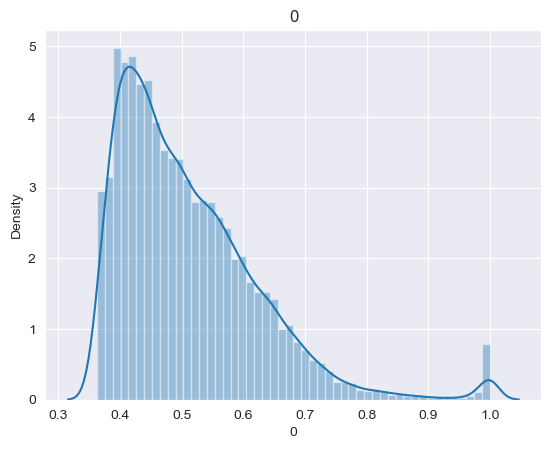

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


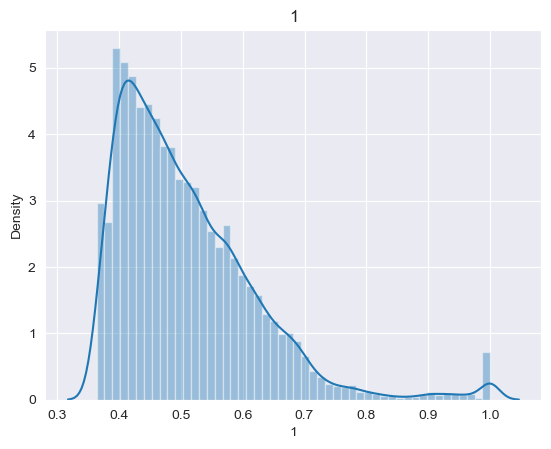

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


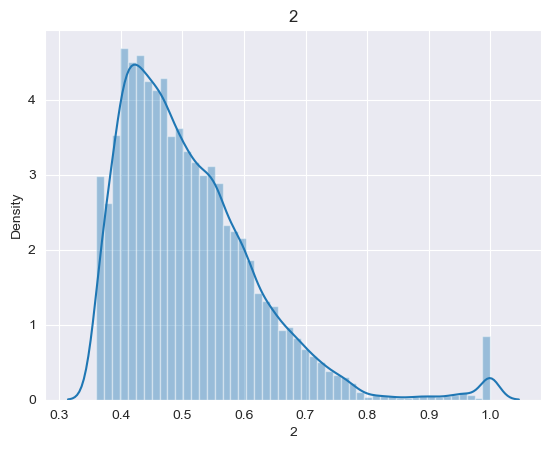

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


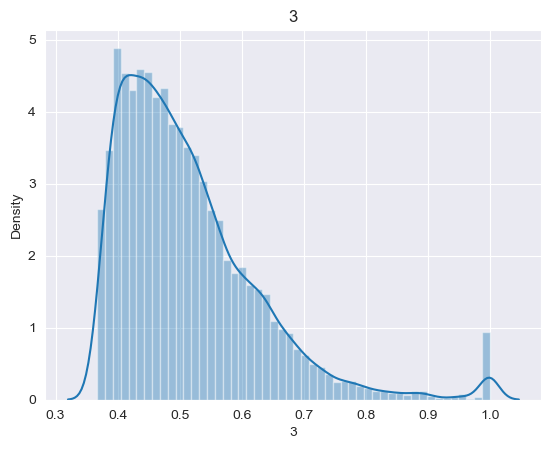

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


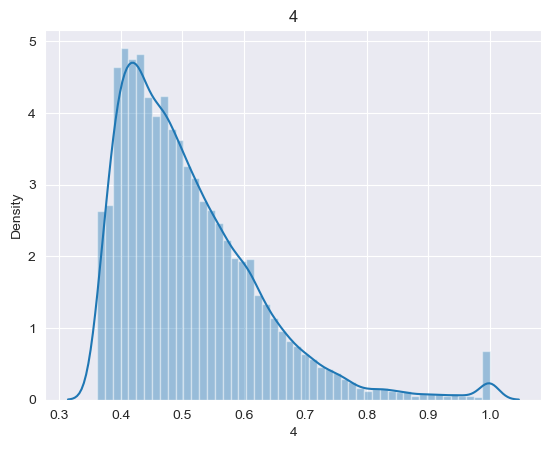

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


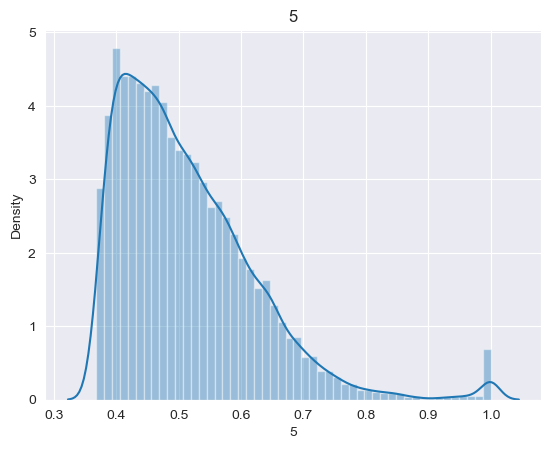

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


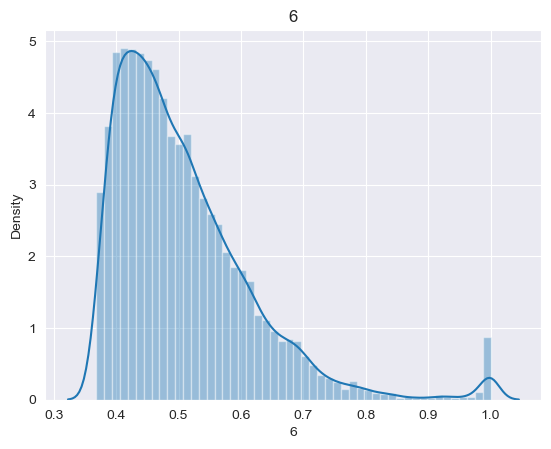

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


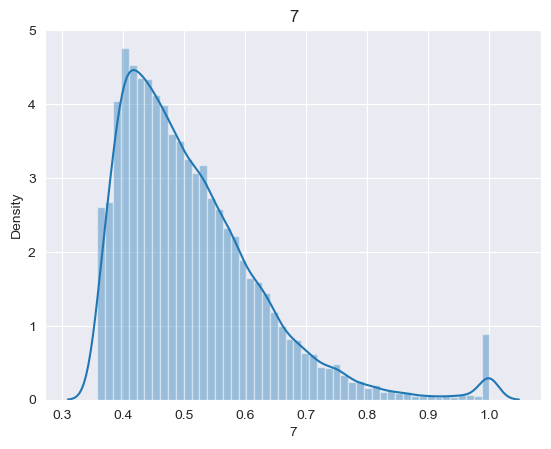

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


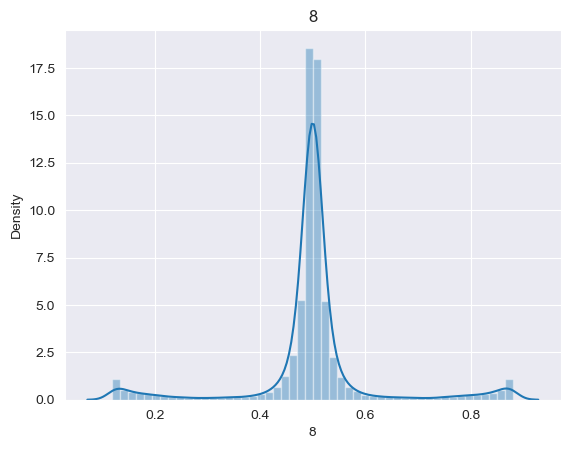

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


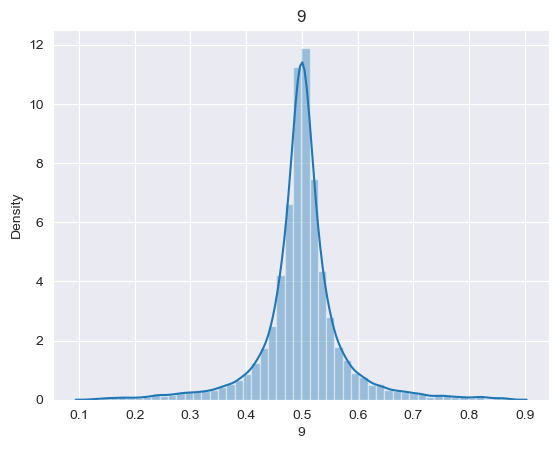

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


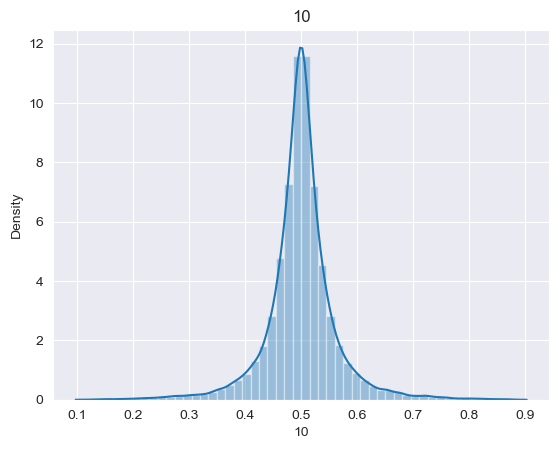

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


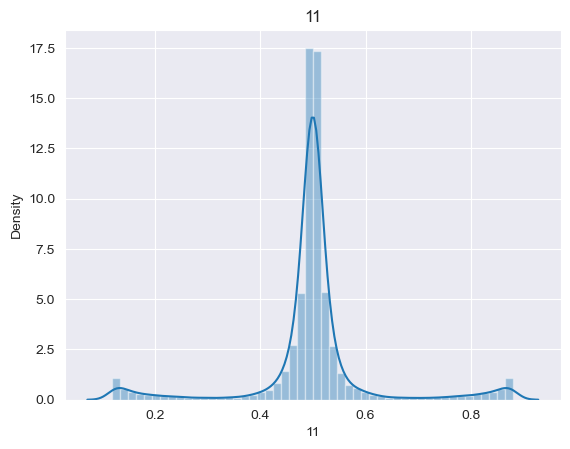

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


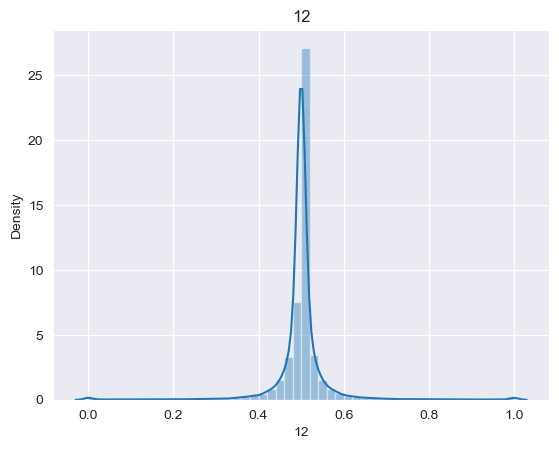

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


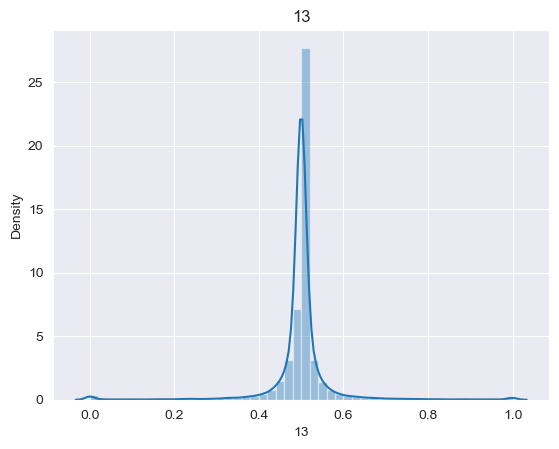

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


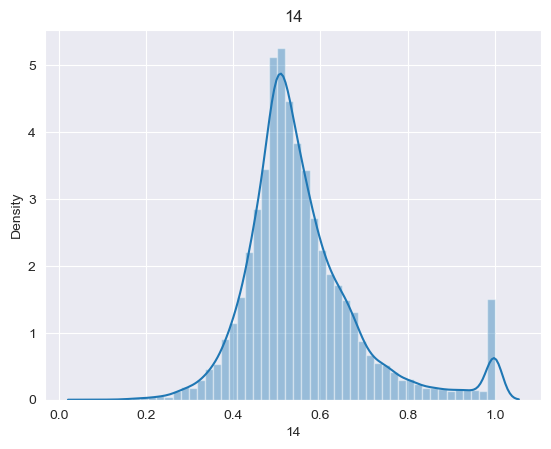

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


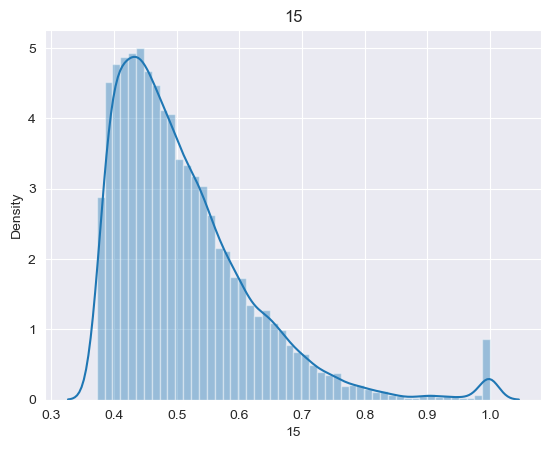

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


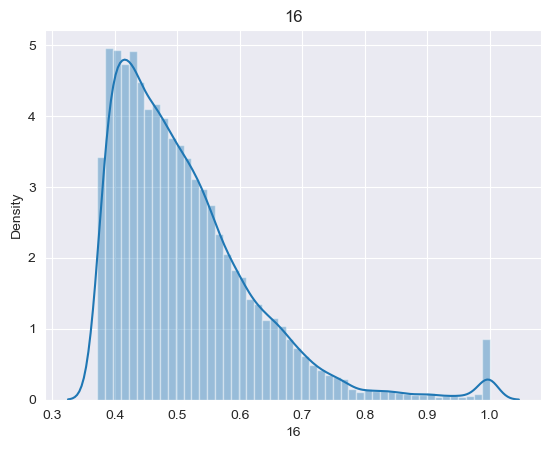

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


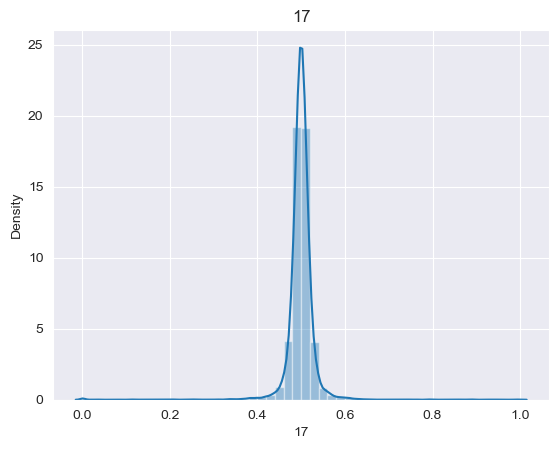

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


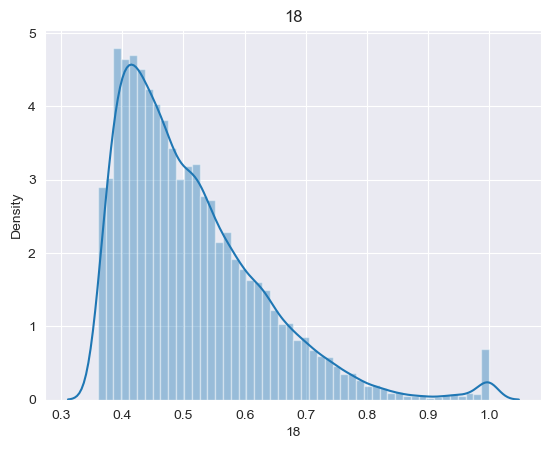

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


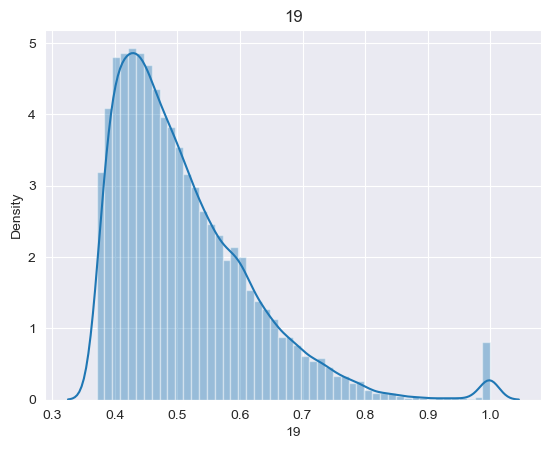

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


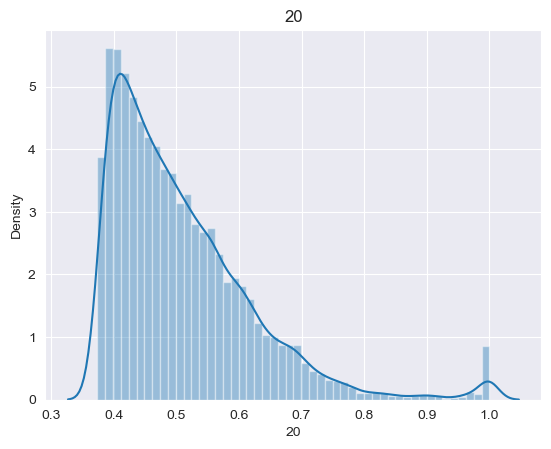

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


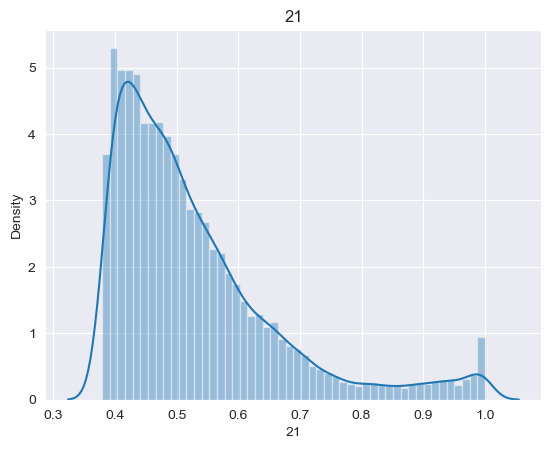

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


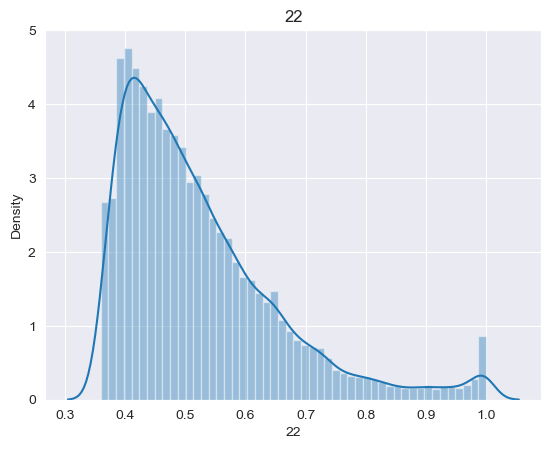

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


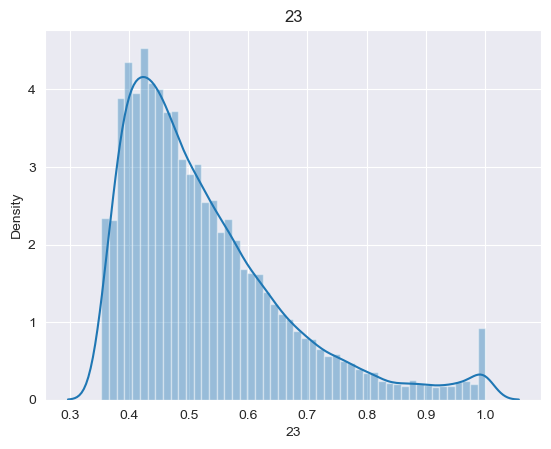

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


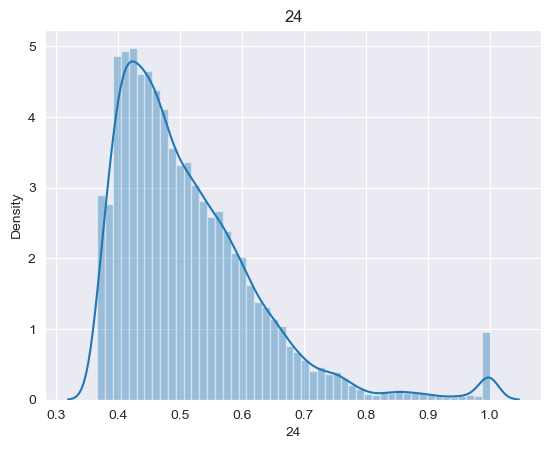

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


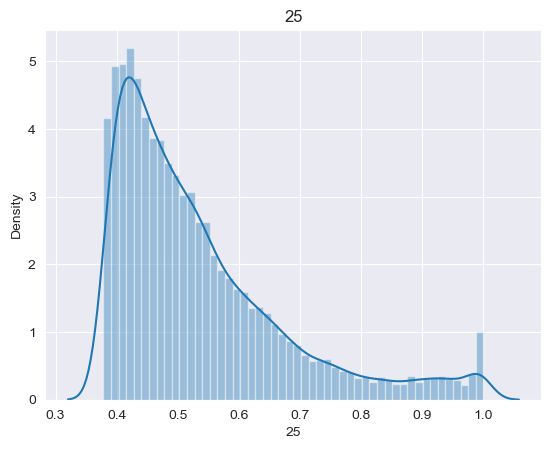

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


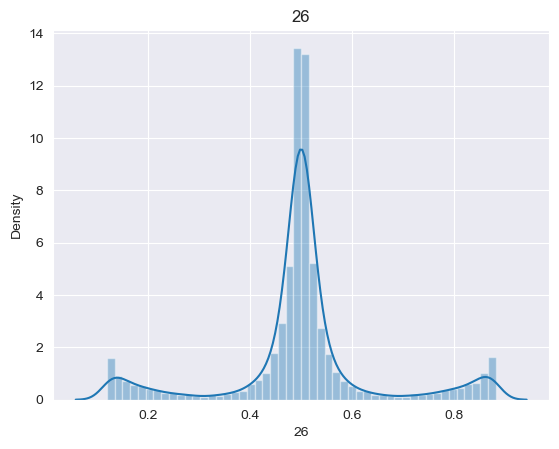

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


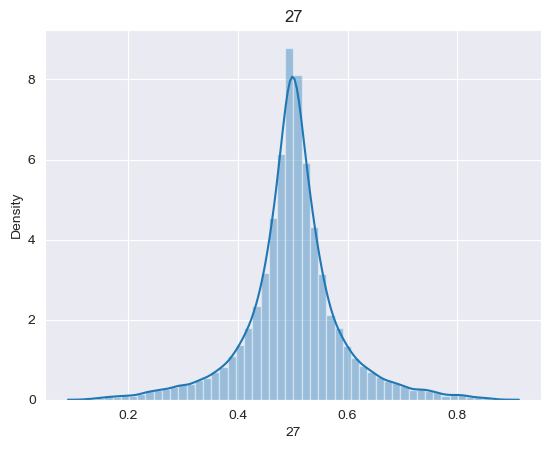

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


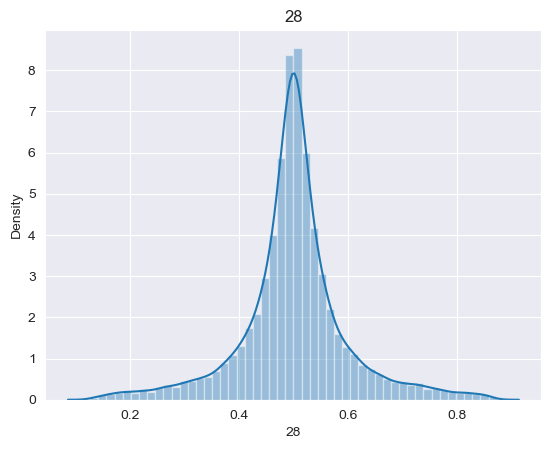

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


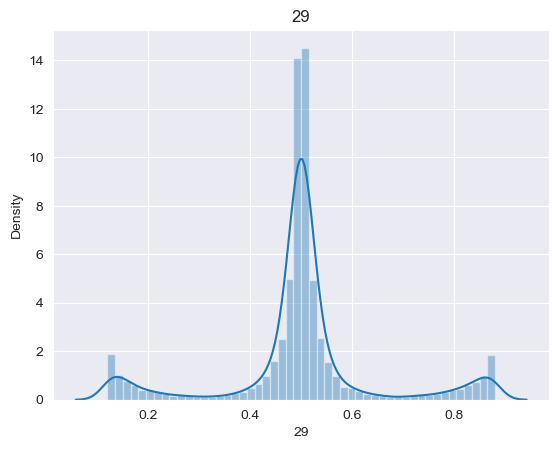

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


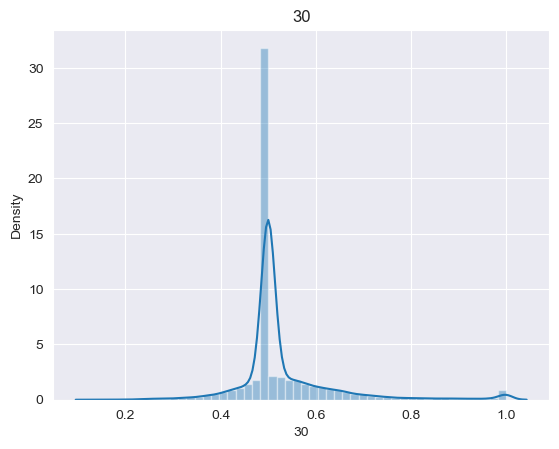

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


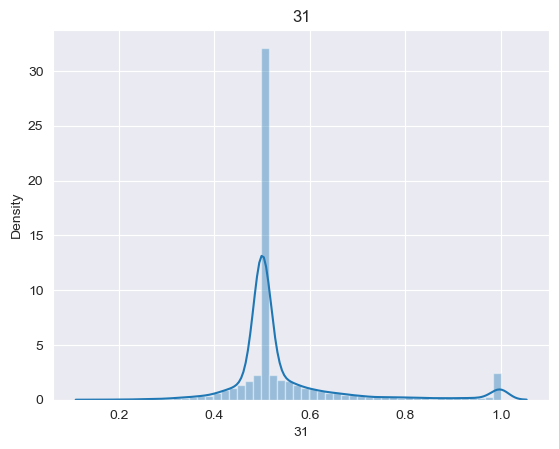

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_1251/349187891.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(master_new.loc[:, i])


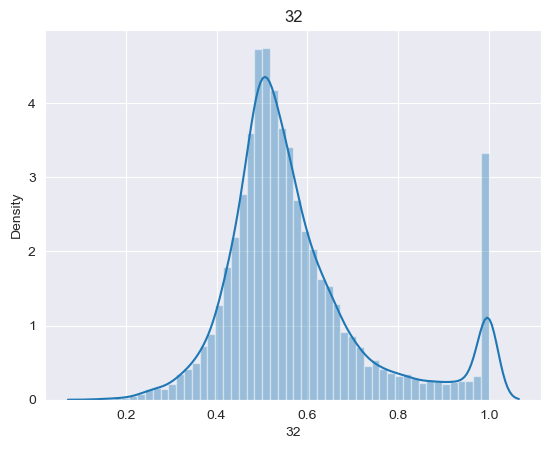

In [69]:
for i in master_new.columns:
	sns.distplot(master_new.loc[:, i])
	plt.title(i)
	plt.show()

This didn't look promising. There were som Beta-looking distributions, bimodal Beta-looking distributions, bi-modal and tri-modal normal distributions, and I had a feeling that finding a common distribution for all would be unlikely.

So let's see if I can get some PCA action to narrow down the information to 2 dimensions. 2D was important to keep graphing easy.

In [70]:
"""Now do same KDE on data after PCA"""
# 2 Which two columns best represent the data?
principal_components = PCA(n_components=2)
# Don't want negative values so will pass this through sigmoid function
principal_component_columns = Matrices.sigmoid(pd.DataFrame(principal_components.fit_transform(seizure)))
principal_component_columns.columns = ['PC1', 'PC2']
principal_component_columns

,PC1,PC2
0,0.903394,0.503340
1,0.908007,0.393772
2,0.904513,0.523009
3,0.904491,0.525256
4,0.904461,0.529664
...,...,...
10234,0.908096,0.393537
10235,0.904600,0.524429
10236,0.904570,0.528838
10237,0.904548,0.531082


And what's this distribution look like?

<AxesSubplot: ylabel='Density'>

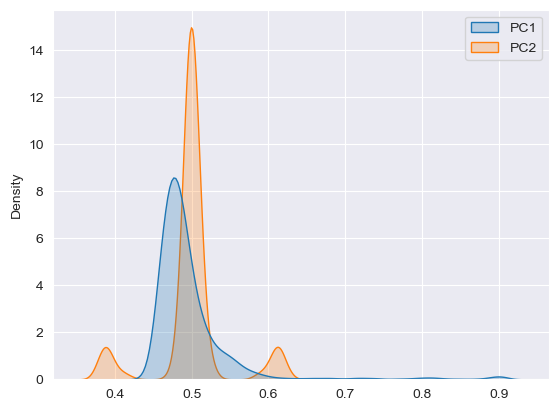

In [72]:
sns.kdeplot(data=principal_component_columns, fill=True, legend=True)

PCA1 looks normal...ish...except for those crazy tails way out there in the boonies.
PCA2 is still tri-modal normal.

What about just the seizure. Is there a distribution there?

Text(0.5, 1.0, 'Seizure Distributions')

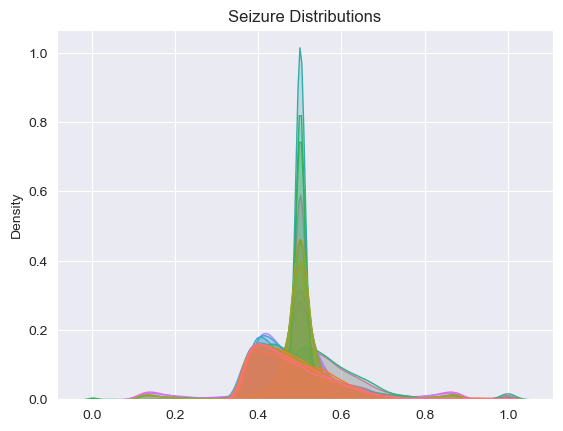

In [76]:
# 1  Get an idea of what the seizure data looks like.
sns.kdeplot(data=seizure, fill=True, legend=False)
plt.title('Seizure Distributions')

It's pretty, but not promising.

What about the averages of the PCAs?

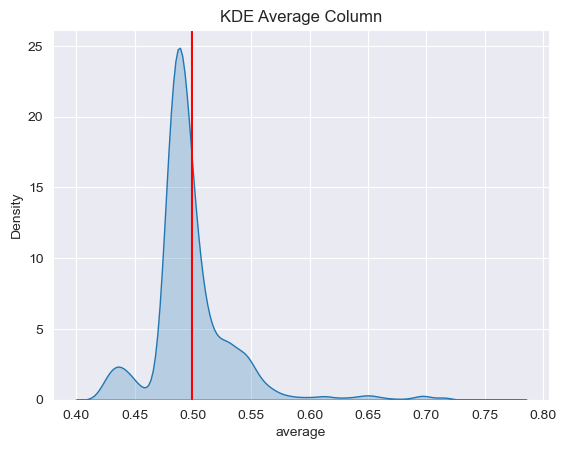

In [77]:
# 3. What the average and STDs of those columns.
principal_component_columns['average'] = abs(
	(principal_component_columns['PC1'] + principal_component_columns['PC2']) / 2)
principal_component_average_column_mean = principal_component_columns['average'].mean()
principal_component_average_column_std = principal_component_columns['average'].std()

sns.kdeplot(data=principal_component_columns['average'], fill=True, legend=True)
plt.title('KDE Average Column')
plt.axvline(x=principal_component_average_column_mean, color='r')

I'm suspecting, as in capstone 2, that because "normal" brain wave activity values are clearly near zero, the 75th percentile numbers are even near zero, but the values around the seizure start itself are near 1, which is going to require some rethinking.

To be sure, let's see how many standard deviations away these max values.

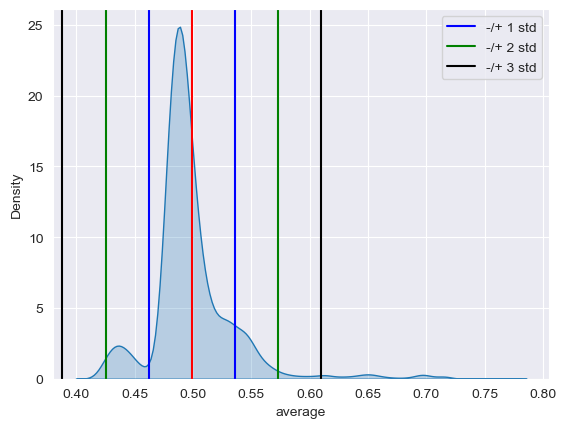

In [95]:
fig, ax = plt.subplots()
sns.kdeplot(data=principal_component_columns['average'], fill=True, legend=False)

line_m = plt.axvline(x=principal_component_average_column_mean, color='r')
line_std_minus1 = plt.axvline(x=principal_component_average_column_mean - principal_component_average_column_std,
							  color='b')
line_std_plus1 = plt.axvline(x=principal_component_average_column_mean + principal_component_average_column_std,
							 color='b')
line_std_plus1.set_label("-/+ 1 std")
line_std_minus2 = plt.axvline(
	x=principal_component_average_column_mean - 2 * principal_component_average_column_std, color='g')
line_std_plus2 = plt.axvline(x=principal_component_average_column_mean + 2 * principal_component_average_column_std,
							 color='g')
line_std_plus2.set_label('-/+ 2 std')
line_std_minus3 = plt.axvline(
	x=principal_component_average_column_mean - 3 * principal_component_average_column_std, color='k')
line_std_plus3 = plt.axvline(x=principal_component_average_column_mean + 3 * principal_component_average_column_std,
							 color='k')
line_std_plus3.set_label("-/+ 3 std")

ax.legend()
plt.show()

Yikes! Some of those values are 6 or 7 standard deviations away from the average.
Finally, let's see if the a statistical test will helpfully determine the shape of the distribution.

In [98]:
"""Is the data normally distributed"""
# Apply Anderson Darling test
# this and all dist="kind" failed
result = anderson(principal_component_columns['average'], dist='extreme1')
print(f'Statistic: {result.statistic}')

for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print(f"Data looks normal (fail to reject H0): {sl, cv}")
print("Data does not look normal (reject H0): {sl, cv}")

Statistic: 1406.2858599697338
Data does not look normal (reject H0): {sl, cv}


# Conclusion

The hope was that Bayesian Inference was going to be the gold standard for this project, but it's clear that the inability to establish a clear distribution shape for the posterior distribution, much less the prior, is going to be impossible.

Choosing a model then will certainly be the challenging part.